# **Experiment 2**



## Extra Trees


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# CM settings
def configure_CM(cm_display, title):
  cm_display.ax_.set_xlabel("Target?")
  cm_display.ax_.set_ylabel("Buys")
  cm_display.ax_.set_xticklabels(["Yes", "No"])
  cm_display.ax_.set_yticklabels(["Yes", "No"])
  cm_display.ax_.set_title(title)

In [ ]:
# defining a function to generate an Extra Trees model and store results to lists
from sklearn.ensemble import ExtraTreesClassifier

def plant_extratrees(name, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features='sqrt', max_leaf_nodes=None, class_weight=None, criterion='gini', min_impurity_decrease=0.0):
  # instantiating model with specified hyperparameters
  model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, random_state=1917, class_weight=class_weight, criterion=criterion)
  # fitting model
  model.fit(X_train, y_train)
  # training results
  preds_train = model.predict(X_train)
  accuracy_train = accuracy_score(y_train, preds_train)
  precision_train = precision_score(y_train, preds_train, labels=[1, 0])
  recall_train = recall_score(y_train, preds_train, labels=[1, 0])
  f1_train = f1_score(y_train, preds_train, labels=[1, 0])
  f2_train = fbeta_score(y_train, preds_train, beta=2, labels=[1, 0])
  f3_train = fbeta_score(y_train, preds_train, beta=3, labels=[1, 0])
  # validation results
  preds_val = model.predict(X_val)
  accuracy_val = accuracy_score(y_val, preds_val)
  precision_val = precision_score(y_val, preds_val, labels=[1, 0])
  recall_val = recall_score(y_val, preds_val, labels=[1, 0])
  f1_val = f1_score(y_val, preds_val, labels=[1, 0])
  f2_val = fbeta_score(y_val, preds_val, beta=2, labels=[1, 0])
  f3_val = fbeta_score(y_val, preds_val, beta=3, labels=[1, 0])
  # Generalization loss
  accuracy_loss = accuracy_train - accuracy_val
  precision_loss = precision_train - precision_val
  recall_loss = recall_train - recall_val
  f1_loss = f1_train - f1_val
  f2_loss = f2_train - f2_val
  f3_loss = f3_train - f2_val
  # Storing info in lists
  model_params = model.get_params
  avg_depth = np.mean([estimator.tree_.max_depth for estimator in model.estimators_])
  model_names_list.append(name)
  number_of_estimators_list.append(n_estimators)
  max_depth_list.append(max_depth)
  avg_depth_list.append(avg_depth)
  min_samples_leaf_list.append(min_samples_leaf)
  max_features_list.append(max_features)
  class_weights.append(class_weight)
  criteria.append(criterion)
  training_accuracy_list.append(accuracy_train)
  training_precision_list.append(precision_train)
  training_recall_list.append(recall_train)
  training_f1_list.append(f1_train)
  training_f2_list.append(f2_train)
  training_f3_list.append(f3_train)
  validation_accuracy_list.append(accuracy_val)
  validation_precision_list.append(precision_val)
  validation_recall_list.append(recall_val)
  validation_f1_list.append(f1_val)
  validation_f2_list.append(f2_val)
  validation_f3_list.append(f3_val)
  accuracy_losses_list.append(accuracy_loss)
  precision_losses_list.append(precision_loss)
  recall_losses_list.append(recall_loss)
  f1_losses_list.append(f1_loss)
  f2_losses_list.append(f2_loss)
  f3_losses_list.append(f3_loss)
  # Printing key measures
  print(f"Training Results for {name}:")
  print("     Accuracy: ", accuracy_train)
  print("     Precision: ", precision_train)
  print("     Recall: ", recall_train)
  print("     F1 Score: ", f1_train)
  print("     F2 Score: ", f2_train)
  print("     F3 Score: ", f3_train)
  print(f"Validation Results for {name}:")
  print("     Accuracy: ", accuracy_val)
  print("     Precision: ", precision_val)
  print("     Recall: ", recall_val)
  print("     F1 Score: ", f1_val)
  print("     F2 Score: ", f2_val)
  print("     F3 Score: ", f3_val)
  print("")
  print(f"Accuracy Generalization Loss for {name}: ", accuracy_loss)
  print(f"Precision Generalization Loss for {name}: ", precision_loss)
  print(f"Recall Generalization Loss for {name}: ", recall_loss)
  print(f"F1 Generalization Loss for {name}: ", f1_loss)
  print("")
  # Confusion Matrices
  cm_train = confusion_matrix(y_train, preds_train, labels=[1, 0])
  cm_val = confusion_matrix(y_val, preds_val, labels=[1, 0])
  cm_train_list.append(cm_train)
  cm_val_list.append(cm_val)
  CM_train = ConfusionMatrixDisplay.from_predictions(y_train, preds_train, labels=[1, 0])
  configure_CM(CM_train, f"Confusion Matrix for {name} on training data")
  plt.show()
  CM_val = ConfusionMatrixDisplay.from_predictions(y_val, preds_val, labels=[1, 0])
  configure_CM(CM_val, f"Confusion Matrix for {name} on validation data")
  # return model
  return model

### 1.   Load Dataset

In [ ]:
file_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/df_1%20(1)"

In [ ]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [ ]:
df.describe()

,Unnamed: 0,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
count,131337.00000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,...,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,65668.00000,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,...,0.115390,0.187868,0.023383,0.062184,0.049057,0.007568,0.187350,0.396842,0.000442,0.415367
std,37913.87049,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,...,0.319493,0.390608,0.151116,0.241490,0.215988,0.086667,0.390194,0.489245,0.021010,0.492787
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32834.00000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65668.00000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98502.00000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,131336.00000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Unnamed: 0                 131337 non-null  int64
 1   Target                     131337 non-null  int64
 2   age_of_vehicle_years       131337 non-null  int64
 3   sched_serv_warr            131337 non-null  int64
 4   non_sched_serv_warr        131337 non-null  int64
 5   sched_serv_paid            131337 non-null  int64
 6   non_sched_serv_paid        131337 non-null  int64
 7   total_paid_services        131337 non-null  int64
 8   total_services             131337 non-null  int64
 9   mth_since_last_serv        131337 non-null  int64
 10  annualised_mileage         131337 non-null  int64
 11  num_dealers_visited        131337 non-null  int64
 12  num_serv_dealer_purchased  131337 non-null  int64
 13  car_model_model_1          131337 non-null  int64
 14  car_

In [ ]:
df.columns

Index(['Unnamed: 0', 'Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 3. Explore Target variable

In [ ]:
target = df['Target']

In [ ]:
target.describe()

count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [ ]:
target_counts = target.value_counts()
target_counts

Target
0    127816
1      3521
Name: count, dtype: int64

In [ ]:
target_imbalance = (target_counts[1] / target_counts[0]).round(2)
print(f"Target Imbalance: {target_imbalance} %")

Target Imbalance: 0.03 %


### 4. Explore Variables of Interest

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Defining a function to:
#   Calculate a response rate for each unique value in a column
#   Display a barchart showing response rates
#   Take as input: dataframe, column

def respond_and_chart(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # make and display barchart
  plt.bar(*zip(*RRs.items()))
  plt.xlabel(f"{col}")
  plt.ylabel('Response Rate')
  plt.title(f'Response Rate by {col}')
  plt.show()

  return RRs

examing response rate for variables with low feature importance in experiment 1

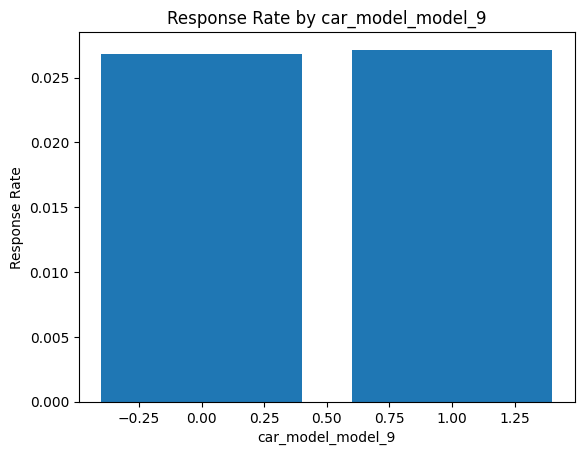

{0: 0.026806195959890443, 1: 0.02716297786720322}

In [ ]:
respond_and_chart(df, 'car_model_model_9', 'Target')

comparing with highest FIs

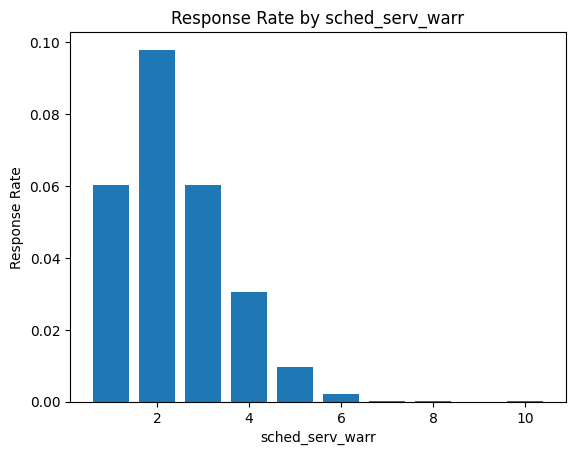

{2: 0.09798375398897592,
 10: 0.000154954675757341,
 8: 0.0001545833977430824,
 9: 0.0,
 4: 0.030543072587401934,
 1: 0.06029368140017799,
 3: 0.06020293122886133,
 7: 7.79058896852602e-05,
 5: 0.009565285014386811,
 6: 0.0020814061054579094}

In [ ]:
respond_and_chart(df, 'sched_serv_warr', 'Target')

In [ ]:
# iterate through cols to find the lowest and highest response rates
# the respond() function returns a dict, with unique values for the col as keys, and rrs as values
# goal is to find:
#   highest and lowest stdev's in rr (how predictive might the col be)
#   highest and lowest mean response rates, determined by summing RRs and dividing by number of unique values

# simplified version of respond without printing:
def respond(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # find RR stdev
  rr_values = list(RRs.values())
  stdev = np.std(rr_values)
  agg_rr = np.sum(rr_values)
  mean_rr = np.mean(rr_values)
  # add info to df
  # RR_df = pd.DataFrame({
  #     'Variable': [col],
  #     'Stdev': [stdev],
  #     'Mean': [mean_rr],
  #     'Aggregate': [agg_rr]
  # })
  return [col, stdev, mean_rr, agg_rr]

results = []

# call respond() for every col in df
for col in df.columns:
  results.append(respond(df, col, 'Target'))

results_df = pd.DataFrame(results, columns=['Variable', 'Stdev', 'Mean', 'Aggregate'])
results_df

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
1,Target,0.500000,0.500000,1.000000
2,age_of_vehicle_years,0.022659,0.026389,0.263886
3,sched_serv_warr,0.033278,0.026106,0.261058
4,non_sched_serv_warr,0.017314,0.026627,0.266266
5,sched_serv_paid,0.031654,0.026149,0.261489
6,non_sched_serv_paid,0.005360,0.026795,0.267946
7,total_paid_services,0.014883,0.026674,0.266735
8,total_services,0.032850,0.026126,0.261260
9,mth_since_last_serv,0.026203,0.026513,0.265129


In [ ]:
#results_df.drop(0, inplace=True)
results_df.drop(1, inplace=True)
rr_variance = results_df.sort_values('Stdev', ascending=False)
rr_agg = results_df.sort_values('Aggregate', ascending=False)
rr_mean = results_df.sort_values('Mean', ascending=False)

The table below shows us how much variance there is in the response rate for the values in a column. This is a proxy for the predictive power of the variable (how much response rate changes depending on the value). The lowest stdevs at the bottom of the table show variables whose values have near-identical response rates. These suggest predictors with less predictive power. We can note that the rankings here are similar to the rankings for Feature Importances from Experiment 1.

In [ ]:
rr_variance

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
3,sched_serv_warr,0.033278,0.026106,0.261058
8,total_services,0.032850,0.026126,0.261260
5,sched_serv_paid,0.031654,0.026149,0.261489
9,mth_since_last_serv,0.026203,0.026513,0.265129
2,age_of_vehicle_years,0.022659,0.026389,0.263886
4,non_sched_serv_warr,0.017314,0.026627,0.266266
10,annualised_mileage,0.015474,0.026688,0.266882
7,total_paid_services,0.014883,0.026674,0.266735
17,car_model_model_13,0.013982,0.040639,0.081279


The table below shows us the mean response rate for variables. This information is important, because we do want to bias our models towards capturing as many Positives (1s) as possible (i.e. maximizing Recall score). Variables may have low stdev in rr (meaning variable is not that helpful in classification) but have a relatively high response rate. Feature Importance and stdev rr might tempt us to drop these variables because of the low stdev, but this might perversely make it harder to capture Positives, so long as we instruct our models to weight Positives in proportion to their sparsity in the dataset.

In [ ]:
rr_mean

,Variable,Stdev,Mean,Aggregate
17,car_model_model_13,0.013982,0.040639,0.081279
22,car_model_model_18,0.011357,0.038148,0.076296
25,car_model_model_3,0.007044,0.032021,0.064043
29,car_model_model_7,0.005030,0.031213,0.062427
20,car_model_model_16,0.004143,0.030945,0.061889
30,car_model_model_8,0.003694,0.030141,0.060282
19,car_model_model_15,0.001570,0.028371,0.056741
32,car_segment_LCV,0.002134,0.028143,0.056286
33,car_segment_Large/SUV,0.002445,0.027313,0.054627
13,car_model_model_1,0.000258,0.027007,0.054014


importing Feature Importances from experiment 1

In [ ]:
fi_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(fi_url)
FIs

,Unnamed: 0,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,0,sched_serv_warr,19.52,19.42,19.42,19.45
1,1,total_services,16.93,18.37,18.37,17.89
2,2,sched_serv_paid,16.61,16.57,16.57,16.58
3,3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,5,annualised_mileage,7.58,7.24,7.24,7.35
6,6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,7,total_paid_services,2.79,2.59,2.59,2.66
8,8,num_dealers_visited,2.75,2.54,2.54,2.61
9,9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


### 5. Prepare Data

In [ ]:
df_clean = df.drop('Unnamed: 0', axis=1)

In [ ]:
df_clean.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

Dropping from featureset X those columns assessed to be unimportant in experiment 1

In [ ]:
X = df_clean.drop(['Target', 'car_model_model_9', 'car_model_model_18', 'car_model_model_17', 'car_model_model_15', 'car_model_model_17', 'car_model_model_18', 'car_model_model_9'], axis=1)

In [ ]:
X.columns

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'car_model_model_1',
       'car_model_model_10', 'car_model_model_11', 'car_model_model_12',
       'car_model_model_13', 'car_model_model_14', 'car_model_model_16',
       'car_model_model_19', 'car_model_model_2', 'car_model_model_3',
       'car_model_model_4', 'car_model_model_5', 'car_model_model_6',
       'car_model_model_7', 'car_model_model_8', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

In [ ]:
y = df_clean.pop('Target')
y

0         0
1         0
2         0
3         0
4         0
         ..
131332    1
131333    1
131334    1
131335    1
131336    1
Name: Target, Length: 131337, dtype: int64

In [ ]:
len(X)

131337

In [ ]:
len(y)

131337

In [ ]:
X.describe()

,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,...,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,...,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,...,0.130001,0.115390,0.187868,0.023383,0.062184,0.049057,0.187350,0.396842,0.000442,0.415367
std,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,...,0.336306,0.319493,0.390608,0.151116,0.241490,0.215988,0.390194,0.489245,0.021010,0.492787
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y.describe()

count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

### 6. Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=1917, stratify=y)
print(len(X_data))
print(len(X_test))
print(len(y_data))
print(len(y_test))



105069
26268
105069
26268


In [ ]:
for col in X_data:
  print(col, len(col))

age_of_vehicle_years 20
sched_serv_warr 15
non_sched_serv_warr 19
sched_serv_paid 15
non_sched_serv_paid 19
total_paid_services 19
total_services 14
mth_since_last_serv 19
annualised_mileage 18
num_dealers_visited 19
num_serv_dealer_purchased 25
car_model_model_1 17
car_model_model_10 18
car_model_model_11 18
car_model_model_12 18
car_model_model_13 18
car_model_model_14 18
car_model_model_16 18
car_model_model_19 18
car_model_model_2 17
car_model_model_3 17
car_model_model_4 17
car_model_model_5 17
car_model_model_6 17
car_model_model_7 17
car_model_model_8 17
car_segment_LCV 15
car_segment_Large/SUV 21
car_segment_Other 17
car_segment_Small/Medium 24


In [ ]:
X_data.shape

(105069, 30)

In [ ]:
y_data.shape

(105069,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=1917, stratify=y_data)

In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0    81801
1     2254
Name: count, dtype: int64
Target
0    20451
1      563
Name: count, dtype: int64
Target
0    25564
1      704
Name: count, dtype: int64


### 7. Baseline Model

In [ ]:
base_train = np.full(y_train.shape, 0)
base_val = np.full(y_val.shape, 0)

In [ ]:
train_perf = y_train
valid_perf = y_val
test_perf = y_test

In [ ]:
# initializing lists for storing metrics and results
model_names_list = []
number_of_estimators_list = []
max_depth_list = []
avg_depth_list = []
min_samples_leaf_list = []
max_features_list = []
class_weights = []
criteria = []
training_accuracy_list = []
training_precision_list = []
training_recall_list = []
training_f1_list = []
training_f2_list = []
training_f3_list = []
validation_accuracy_list = []
validation_precision_list = []
validation_recall_list = []
validation_f1_list = []
validation_f2_list = []
validation_f3_list = []
accuracy_losses_list = []
precision_losses_list = []
recall_losses_list = []
f1_losses_list = []
f2_losses_list = []
f3_losses_list = []
cm_train_list = []
cm_val_list = []

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

Training results: 

Accuracy of Baseline Model:  0.9731842246148356
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
[[    0  2254]
 [    0 81801]]

Validation Results: 

Accuracy of Baseline Model:  0.9732083372989435
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
[[    0   563]
 [    0 20451]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


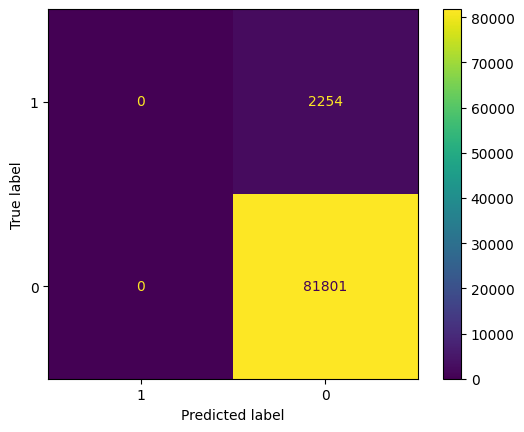

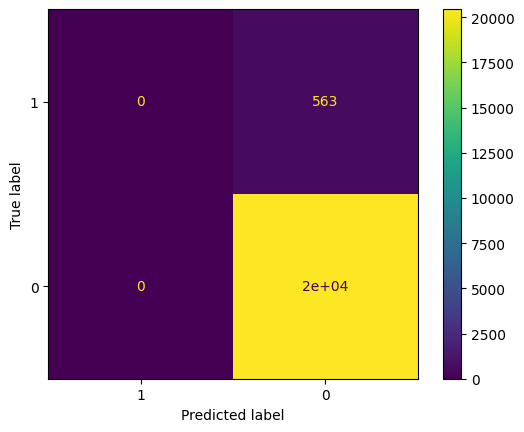

In [ ]:
print("Training results: ")
print("")

accuracy_base_train = accuracy_score(y_train, base_train)
print("Accuracy of Baseline Model: ", accuracy_base_train)

precision_base_train = precision_score(y_train, base_train, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_train)

recall_base_train = recall_score(y_train, base_train, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_train)

f1_base_train = f1_score(y_train, base_train, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_train)

f2_base_train = fbeta_score(y_train, base_train, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_train)

f3_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_train)

cm_base_train = confusion_matrix(y_train, base_train, labels=[1, 0])
print(cm_base_train)

print("")
print("Validation Results: ")
print("")
accuracy_base_val = accuracy_score(y_val, base_val)
print("Accuracy of Baseline Model: ", accuracy_base_val)

precision_base_val = precision_score(y_val, base_val, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_val)

recall_base_val = recall_score(y_val, base_val, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_val)

f1_base_val = f1_score(y_val, base_val, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_val)

f2_base_val = fbeta_score(y_val, base_val, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_val)

f3_base_val = fbeta_score(y_val, base_val, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_val)

cm_base_val = confusion_matrix(y_val, base_val, labels=[1, 0])
print(cm_base_val)

accuracy_base_loss = accuracy_base_train - accuracy_base_val
precision_base_loss = precision_base_train - precision_base_val
recall_base_loss = recall_base_train - recall_base_val
f1_base_loss = f1_base_train - f1_base_val
f2_base_loss = f2_base_train - f2_base_val
f3_base_loss = f3_base_train - f3_base_val

model_names_list.append("Baseline")
number_of_estimators_list.append(None)
max_depth_list.append(None)
avg_depth_list.append(None)
min_samples_leaf_list.append(None)
max_features_list.append(None)
class_weights.append(None)
training_accuracy_list.append(accuracy_base_train)
training_precision_list.append(precision_base_train)
training_recall_list.append(recall_base_train)
training_f1_list.append(f1_base_train)
training_f2_list.append(f2_base_train)
training_f3_list.append(f3_base_train)
validation_accuracy_list.append(accuracy_base_val)
validation_precision_list.append(precision_base_val)
validation_recall_list.append(recall_base_val)
validation_f1_list.append(f1_base_val)
validation_f2_list.append(f2_base_val)
validation_f3_list.append(f3_base_val)
accuracy_losses_list.append(accuracy_base_loss)
precision_losses_list.append(precision_base_loss)
recall_losses_list.append(recall_base_loss)
f1_losses_list.append(f1_base_loss)
f2_losses_list.append(f2_base_loss)
f3_losses_list.append(f3_base_loss)

ConfusionMatrixDisplay.from_predictions(y_train, base_train, labels=[1, 0])
ConfusionMatrixDisplay.from_predictions(y_val, base_val, labels=[1, 0])

### 8. Train Machine Learning Model

Importing Recall Validation results from Experiment 1 to suggest some possible hyperparameter tunings

In [ ]:
recall_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/exp-1-models-by-recall%20(2)"
exp1_models_by_recall = pd.read_csv(recall_url)
exp1_models_by_recall

,Unnamed: 0,Model,No. Estimators,Max Depth,Avg Depth,Min Samples Leaf,Max Features,Class Weight,Train Accuracy,Train Precision,...,Train F2,Validation Accuracy,Validation Precision,Validation Recall,Validation F1,Validation F2,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F1 Generalization Loss
0,42,rf30a,350,5.0,5.000000,10,sqrt,"{0: 0.5, 1: 25}",0.764952,0.101171,...,0.358539,0.760350,0.099122,0.982238,0.180072,0.353084,0.004601,0.002050,0.002678,0.003422
1,41,rf30,350,5.0,5.000000,10,sqrt,"{0: 0.5, 1: 20}",0.816668,0.125569,...,0.414911,0.813363,0.123684,0.980462,0.219658,0.411020,0.003305,0.001886,-0.001757,0.002923
2,33,rf28,350,5.0,5.000000,10,sqrt,balanced,0.846351,0.146167,...,0.457207,0.843533,0.143791,0.976909,0.250684,0.452526,0.002818,0.002376,0.000020,0.003604
3,40,rf_gs4,300,5.0,0.470000,5,sqrt,balanced,0.659854,0.071659,...,0.277044,0.659132,0.071429,0.976909,0.133124,0.276326,0.000722,0.000230,0.000464,0.000404
4,34,rf28b,350,4.0,4.000000,10,sqrt,balanced,0.753840,0.096300,...,0.345201,0.750690,0.095081,0.975133,0.173268,0.342013,0.003150,0.001218,0.000466,0.002028
5,36,rf_gs,300,5.0,5.000000,5,sqrt,balanced,0.830992,0.134942,...,0.435082,0.827639,0.131889,0.973357,0.232302,0.427657,0.003353,0.003053,0.006678,0.004919
6,39,rf_gs3,300,5.0,5.000000,5,sqrt,balanced,0.816299,0.125178,...,0.413801,0.814743,0.123814,0.973357,0.219683,0.410302,0.001556,0.001364,0.003573,0.002237
7,37,rf_gs1,300,5.0,5.000000,5,sqrt,balanced,0.829814,0.134086,...,0.433230,0.826782,0.131320,0.973357,0.231419,0.426459,0.003032,0.002766,0.006235,0.004466
8,43,rf_rand,309,4.0,4.000000,13,7,balanced,0.754375,0.096773,...,0.346773,0.751309,0.095015,0.971581,0.173101,0.341491,0.003066,0.001758,0.007567,0.003036
9,38,rf_gs2,300,5.0,4.230000,10,sqrt,balanced,0.728487,0.087187,...,0.320090,0.724565,0.086302,0.968028,0.158476,0.318081,0.003923,0.000884,-0.004408,0.001429


Default Extra Trees model

Training Results for ET_def:
     Accuracy:  0.9999762060555588
     Precision:  1.0
     Recall:  0.9991126885536823
     F1 Score:  0.9995561473590767
     F2 Score:  0.9992900248491302
     F3 Score:  0.9992013488330819
Validation Results for ET_def:
     Accuracy:  0.9884838678975921
     Precision:  0.9598853868194842
     Recall:  0.5950266429840142
     F1 Score:  0.7346491228070174
     F2 Score:  0.6439830834294502
     F3 Score:  0.6185376661742984

Accuracy Generalization Loss for ET_def:  0.011492338157966686
Precision Generalization Loss for ET_def:  0.04011461318051579
Recall Generalization Loss for ET_def:  0.4040860455696681
F1 Generalization Loss for ET_def:  0.2649070245520593



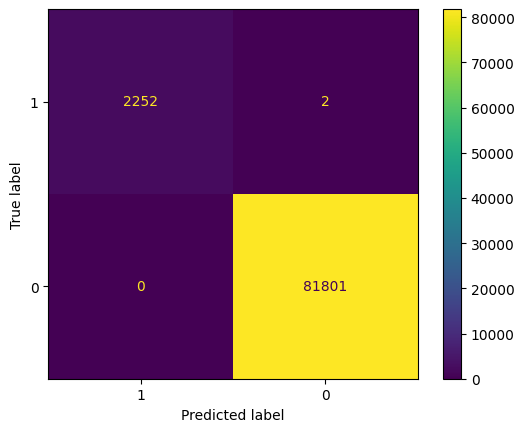

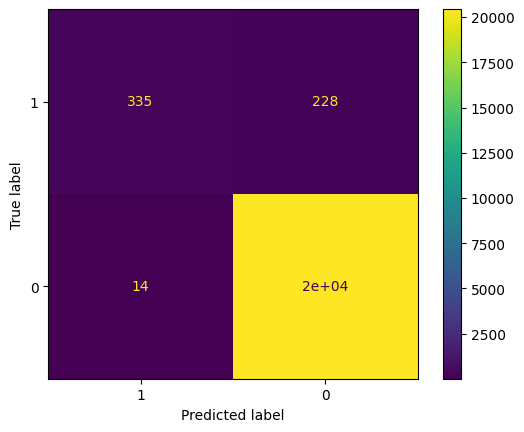

In [ ]:
ET_def = plant_extratrees("ET_def")

ET_balanced: default model but with balanced class weight, to see if we can eliminate training FNs

In [ ]:
np.bincount(y_train)

array([81801,  2254])

In [ ]:
ET_balanced = plant_extratrees("ET_balanced", class_weight='balanced')

KeyboardInterrupt: 

trying roughly best parameters from Experiment 1

In [ ]:
ET1 = plant_extratrees("ET1", n_estimators=300, min_samples_leaf=5, criterion='entropy', max_depth=5, class_weight='balanced')

In [ ]:
ConfusionMatrixDisplay.from_estimator(ET1, X_val, y_val, normalize='true')

We would want to see first if we can reduce ET's training Recall to a level comparable to the RF models.  We should also run these models through the same featureset as the RF models to see if there's any difference.

ET1A: trying similar params but boosting n_estimators up to 500

In [ ]:
ET1A = plant_extratrees("ET1A", n_estimators=500, max_depth=5, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET1B: trying n_estimators=350 (good results in experiment 1 for this param)

In [ ]:
ET1B = plant_extratrees("ET1B", n_estimators=350, max_depth=5, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET1C: dropping n_estimators down to 250 to judge whether more or less trees is better when other params held constant

In [ ]:
ET1C = plant_extratrees("ET1C", n_estimators=250, max_depth=5, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

In [ ]:
ET1D = plant_extratrees("ET1D", n_estimators=200, max_depth=5, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

In [ ]:
exp1_models_by_recall

ET2: trying ET1C's params with min_samples_leaf=10, which performed well in experiment 1

In [ ]:
ET2 = plant_extratrees("ET2", n_estimators=250, max_depth=5, min_samples_leaf=10, criterion='entropy', class_weight='balanced')

ET3: ET1C's params but with gini criterion

In [ ]:
ET3 = plant_extratrees("ET3", n_estimators=250, max_depth=5, min_samples_leaf=5, criterion='gini', class_weight='balanced')

ET4: Allowing greater max depth

In [ ]:
ET4 = plant_extratrees("ET4", n_estimators=250, max_depth=10, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET4A: trying no max_depth

In [ ]:
ET4A = plant_extratrees("ET4A", n_estimators=250, max_depth=None, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

when max_depth=None for ET3, avg_depth was 29.14

In [ ]:
ET4B = plant_extratrees("ET4B", n_estimators=250, max_depth=20, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET4C: max_depth=15

In [ ]:
ET4C = plant_extratrees("ET4C", n_estimators=250, max_depth=15, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET4D

In [ ]:
ET4D = plant_extratrees("ET4D", n_estimators=250, max_depth=4, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET5: trying ET4's params but with greater min_samples_leaf

In [ ]:
ET5 = plant_extratrees("ET5", n_estimators=250, max_depth=10, min_samples_leaf=10, criterion='entropy', class_weight='balanced')

ET5A: trying default min_samples_leaf=1

In [ ]:
ET5A = plant_extratrees("ET5A", n_estimators=250, max_depth=10, criterion='entropy', class_weight='balanced')

ET5B: trying 4 for min_samples_leaf

In [ ]:
ET5B = plant_extratrees("ET5B", n_estimators=250, max_depth=10, min_samples_leaf=4, criterion='entropy', class_weight='balanced')

ET6: tuning max_features, starting with log2

In [ ]:
import math

n_features = len(X_train.columns)
print("Number of features: ", n_features)
sqrt = math.sqrt(n_features)
print("sqrt: ", sqrt)
log2 = math.log(n_features, 2)
print("Log2 of features", log2)

In [ ]:
ET6 = plant_extratrees("ET6", n_estimators=250, max_depth=10, max_features='log2', min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET6A: trying max_features=None

In [ ]:
ET6A = plant_extratrees("ET6A", n_estimators=250, max_depth=10, max_features=None, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET6B: roughly doubling max_features over default to 10

In [ ]:
ET6B = plant_extratrees("ET6B", n_estimators=250, max_depth=10, max_features=10, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET6C: trying max_features=4

In [ ]:
ET6C = plant_extratrees("ET6C", n_estimators=250, max_depth=10, max_features=4, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET7: experimenting with min_samples_split

In [ ]:
ET7 = plant_extratrees("ET7", n_estimators=250, max_depth=10, min_samples_split=3, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

In [ ]:
ET7A = plant_extratrees("ET7A", n_estimators=250, max_depth=10, min_samples_split=6, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

ET8: trying balanced subsample

In [ ]:
ET8 = plant_extratrees("ET8", n_estimators=250, max_depth=10, min_samples_leaf=5, criterion='entropy', class_weight='balanced_subsample')

GridSearch

Using GridSearch to optimize for Recall Score

In [ ]:
recall_opt_grid = {
    'n_estimators': np.arange(250, 300, 25),
    'max_depth': [6, 8, 10],
    'min_samples_leaf': [5, 7, 9]
}

from sklearn.model_selection import GridSearchCV

ET_recalls = GridSearchCV(ET_pref, recall_opt_grid, scoring='recall', verbose=1)
ET_recalls.fit(X_train, y_train)
ET_recalls.best_params_

In [ ]:
ET_recall_opt = plant_extratrees("ET_recall_opt", n_estimators=250, criterion='entropy', min_samples_leaf=9, max_depth=9, class_weight='balanced')

optima when fitting for recall score:

- max_depth=6
- msl=9
- n_estimators=250

A second grid search would look for:
- md 6/7
- msl 9/8
- n_estimators between 250 and 275

In [ ]:
recall_opt_grid2 = {
    'n_estimators': np.arange(250, 275, 5),
    'max_depth': [6, 7],
    'min_samples_leaf': [8, 9]
}

ET_recalls_again = GridSearchCV(ET_pref, recall_opt_grid2, scoring='recall', verbose=1)
ET_recalls_again.fit(X_train, y_train)
ET_recalls_again.best_params_

Training Results for ET_recall_opt2:
     Accuracy:  0.769436678365356
     Precision:  0.10275561328632399
     Recall:  0.9826974267968057
     F1 Score:  0.1860562788744225
     F2 Score:  0.36225958393301055
     F3 Score:  0.5293724009368577
Validation Results for ET_recall_opt2:
     Accuracy:  0.7652041496145426
     Precision:  0.10067604604421707
     Recall:  0.9786856127886323
     F1 Score:  0.182571239231279
     F2 Score:  0.3566343042071197
     F3 Score:  0.5227703984819735

Accuracy Generalization Loss for ET_recall_opt2:  0.004232528750813369
Precision Generalization Loss for ET_recall_opt2:  0.0020795672421069222
Recall Generalization Loss for ET_recall_opt2:  0.004011814008173409
F1 Generalization Loss for ET_recall_opt2:  0.003485039643143506



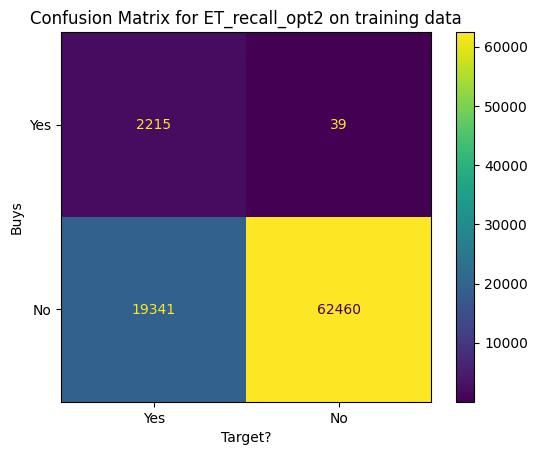

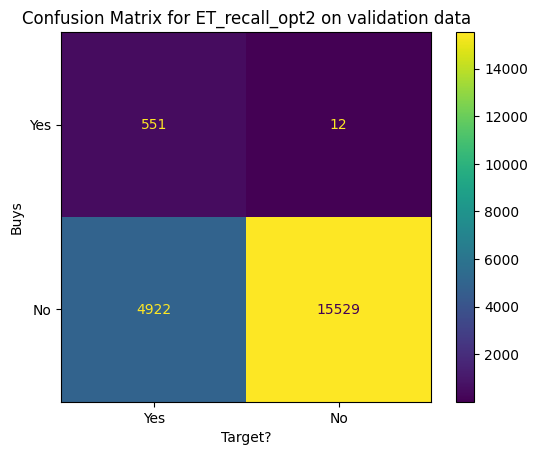

In [ ]:
ET_recall_opt2 = plant_extratrees("ET_recall_opt2", n_estimators=270, criterion='entropy', max_depth=6, min_samples_leaf=2, class_weight='balanced')

Running GridSearch with F3 scoring method

In [ ]:
n_features = len(X_train.columns)
print("Number of features: ", n_features)
sqrt = math.sqrt(n_features)
print("sqrt: ", sqrt)
log2 = math.log(n_features, 2)
print("Log2 of features", log2)

estimated hyperparam ranges for optimizing F3 Score:
- n_estimators between 250 and 100
- max_depth between 20 and None
- min_samples_leaf between 5 and 1
- max_features between sqrt and None

In [ ]:
F3_opt_grid = {
    'n_estimators': np.arange(150, 250, 50),
    'max_depth': np.arange(20, 30, 5),
    'min_samples_leaf': [2, 3, 4, 5],
    'max_features': ['sqrt', 18, 30]
}

from sklearn.metrics import make_scorer

f3_score = make_scorer(fbeta_score, beta=3)

ET_F3_opt = GridSearchCV(ET_pref, F3_opt_grid, scoring=f3_score, verbose=1)
ET_F3_opt.fit(X_train, y_train)
ET_F3_opt.best_params_

F3 optimized params: {'max_depth': 25,
 'max_features': 18,
 'min_samples_leaf': 5,
 'n_estimators': 200}

second F3 optimization round:
- n_estimators between 200 and 250
- mf between 18 and sqrt
- msl=5
- md between 25 and 29

In [ ]:
F3_opt_grid2 = {
    'n_estimators': np.arange(200, 250, 10),
    'max_depth': [25, 27, 29],
    'max_features': ['sqrt', 12, 18]
}

ET_pref2 = ExtraTreesClassifier(criterion='entropy', min_samples_leaf=5, class_weight='balanced')

ET_F3_opt2 = GridSearchCV(ET_pref2, F3_opt_grid2, scoring=f3_score, verbose=1)
ET_F3_opt2.fit(X_train, y_train)
ET_F3_opt2.best_params_

In [ ]:
ET_f3_opt1 = plant_extratrees("ET_f3_opt1", n_estimators=200, max_depth=15, max_features=18, min_samples_leaf=5, criterion='entropy', class_weight='balanced')

### 9. Assess Model Performance

In [ ]:
val_FNs = []
val_FPs = []

base_FNs = cm_base_val[0][1]
base_FPs = cm_base_val[1][0]

val_FNs.append(base_FNs)
val_FPs.append(base_FPs)

for cm in cm_val_list:
  val_FNs.append(cm[0][1])
  val_FPs.append(cm[1][0])

In [ ]:
print(
    len(model_names_list),
    len(number_of_estimators_list),
    len(max_depth_list),
    len(avg_depth_list),
    len(min_samples_leaf_list),
    len(max_features_list),
    len(class_weights),
    len(training_accuracy_list),
    len(training_precision_list),
    len(training_recall_list),
    len(training_f1_list),
    len(training_f2_list),
    len(training_f3_list),
    len(val_FNs),
    len(val_FPs),
    len(validation_accuracy_list),
    len(validation_precision_list),
    len(validation_recall_list),
    len(validation_f1_list),
    len(validation_f2_list),
    len(validation_f3_list),
    len(accuracy_losses_list),
    len(precision_losses_list),
    len(recall_losses_list),
    len(f1_losses_list),
    len(f2_losses_list),
    len(f3_losses_list)
)

- class weights missing one entry
- f2 losses and f3 losses lists are empty

In [ ]:
ET_eval = pd.DataFrame({
    'Model': model_names_list,
    'No. Estimators': number_of_estimators_list,
    'Max Depth': max_depth_list,
    'Avg Depth': avg_depth_list,
    'Min Samples Leaf': min_samples_leaf_list,
    'Max Features': max_features_list,
    #'Class Weight': class_weights,
    'Train Accuracy': training_accuracy_list,
    'Train Precision': training_precision_list,
    'Train Recall': training_recall_list,
    'Train F1': training_f1_list,
    'Train F2': training_f2_list,
    'Train F3': training_f3_list,
    'Validation FNs': val_FNs,
    'Validation FPs': val_FPs,
    'Validation Accuracy': validation_accuracy_list,
    'Validation Precision': validation_precision_list,
    'Validation Recall': validation_recall_list,
    'Validation F1': validation_f1_list,
    'Validation F2': validation_f2_list,
    'Validation F3': validation_f3_list,
    'Accuracy Generalization Loss': accuracy_losses_list,
    'Precision Generalization Loss': precision_losses_list,
    'Recall Generalization Loss': recall_losses_list,
    'F1 Generalization Loss': f1_losses_list,
    #'F2 Generalization Loss': f2_losses_list,
    #'F3 Generalization Loss': f3_losses_list
})

ET_eval.fillna("None", inplace=True)

In [ ]:
ETs_by_recall = ET_eval.sort_values('Validation Recall', ascending=False)
ETs_by_F3 = ET_eval.sort_values('Validation F3', ascending=False)

In [ ]:
ETs_by_recall.to_csv("ETs_by_recall")

In [ ]:
ETs_by_recall

,Model,No. Estimators,Max Depth,Avg Depth,Min Samples Leaf,Max Features,Train Accuracy,Train Precision,Train Recall,Train F1,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F1,Validation F2,Validation F3,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F1 Generalization Loss
2,ET_recall_opt2,270.0,6.0,6.0,2.0,sqrt,0.769437,0.102756,0.982697,0.186056,...,0.765204,0.100676,0.978686,0.182571,0.356634,0.522770,0.004233,0.002080,0.004012,0.003485
1,ET_def,100.0,None,34.71,1.0,sqrt,0.999976,1.000000,0.999113,0.999556,...,0.988484,0.959885,0.595027,0.734649,0.643983,0.618538,0.011492,0.040115,0.404086,0.264907
0,Baseline,None,None,None,None,None,0.973184,0.000000,0.000000,0.000000,...,0.973208,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000024,0.000000,0.000000,0.000000


In [ ]:
ETs_by_F3

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =

Testing

ET4

In [ ]:
preds_ET4_test = ET4.predict(X_test)
recall_ET4_test = recall_score(y_test, preds_ET4_test)
precision_ET4_test = precision_score(y_test, preds_ET4_test)
f3_ET4_test = fbeta_score(y_test, preds_ET4_test, beta=3)
accuracy_ET4_test = accuracy_score(y_test, preds_ET4_test)

print("ET4's Results on Test Set: ")
print("   Recall: ", recall_ET4_test)
print("   Precision: ", precision_ET4_test)
print("   F3 Score: ", f3_ET4_test)
print("   Accuracy: ", accuracy_ET4_test)

ConfusionMatrixDisplay.from_predictions(y_test, preds_ET4_test, labels=[1, 0])

ET4's Confusion Matrix Normalized over the true classes

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds_ET4_test, normalize='true', labels=[1, 0])

ET_recall_opt

In [ ]:
preds_ET_recall_opt_test = ET_recall_opt.predict(X_test)
recall_ET_recall_opt_test = recall_score(y_test, preds_ET_recall_opt_test)
precision_ET_recall_opt_test = precision_score(y_test, preds_ET_recall_opt_test)
f3_ET_recall_opt_test = fbeta_score(y_test, preds_ET_recall_opt_test, beta=3)
accuracy_ET_recall_opt_test = accuracy_score(y_test, preds_ET_recall_opt_test)

print("ET_recall_opt's Results on Test Set: ")
print("   Recall: ", recall_ET_recall_opt_test)
print("   Precision: ", precision_ET_recall_opt_test)
print("   F3 Score: ", f3_ET_recall_opt_test)
print("   Accuracy: ", accuracy_ET_recall_opt_test)

ConfusionMatrixDisplay.from_predictions(y_test, preds_ET_recall_opt_test, labels=[1, 0])

Normalized over true classes

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds_ET_recall_opt_test, normalize='true', labels=[1, 0])

ET_recall_opt2

ET_recall_opt2's Results on Test Set: 
   Recall:  0.9829545454545454
   Precision:  0.10461073318216176
   F1 Score:  0.18909687115726193
   F3 Score:  0.5343216740020076
   F4 Score:  0.6579786341517981
   F10 Score:  0.9075115237291436
   Accuracy:  0.7740596924014009


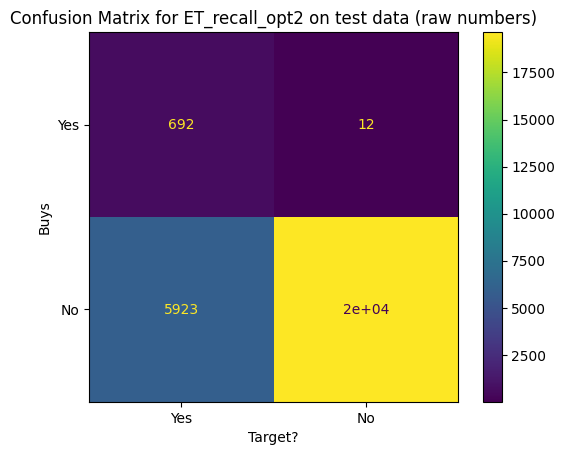

In [ ]:
preds_ET_recall_opt2_test = ET_recall_opt2.predict(X_test)
recall_ET_recall_opt2_test = recall_score(y_test, preds_ET_recall_opt2_test)
precision_ET_recall_opt2_test = precision_score(y_test, preds_ET_recall_opt2_test)
f1_ET_recall_opt2_test = f1_score(y_test, preds_ET_recall_opt2_test)
f3_ET_recall_opt2_test = fbeta_score(y_test, preds_ET_recall_opt2_test, beta=3)
f4_ET_recall_opt2_test = fbeta_score(y_test, preds_ET_recall_opt2_test, beta=4)
f10_ET_recall_opt2_test = fbeta_score(y_test, preds_ET_recall_opt2_test, beta=10)
accuracy_ET_recall_opt2_test = accuracy_score(y_test, preds_ET_recall_opt2_test)

print("ET_recall_opt2's Results on Test Set: ")
print("   Recall: ", recall_ET_recall_opt2_test)
print("   Precision: ", precision_ET_recall_opt2_test)
print("   F1 Score: ", f1_ET_recall_opt2_test)
print("   F3 Score: ", f3_ET_recall_opt2_test)
print("   F4 Score: ", f4_ET_recall_opt2_test)
print("   F10 Score: ", f10_ET_recall_opt2_test)
print("   Accuracy: ", accuracy_ET_recall_opt2_test)

CM_ETro2_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_ET_recall_opt2_test, labels=[1, 0])
configure_CM(CM_ETro2_raw, "Confusion Matrix for ET_recall_opt2 on test data (raw numbers)")
plt.show()

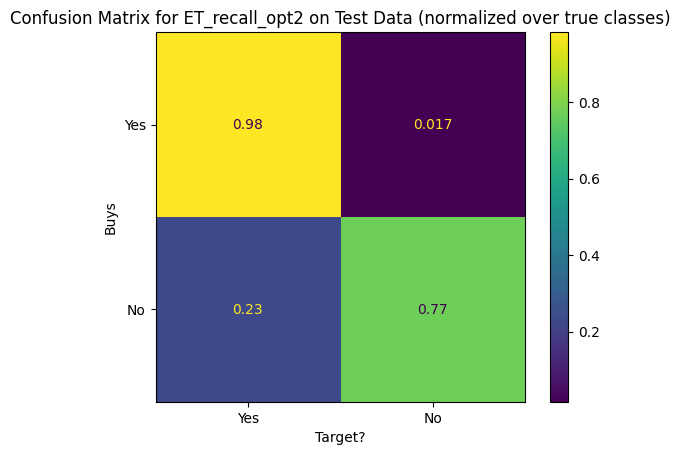

In [ ]:
CM_ETro2_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_ET_recall_opt2_test, normalize='true', labels=[1, 0])
configure_CM(CM_ETro2_true, "Confusion Matrix for ET_recall_opt2 on Test Data (normalized over true classes)")
plt.show()

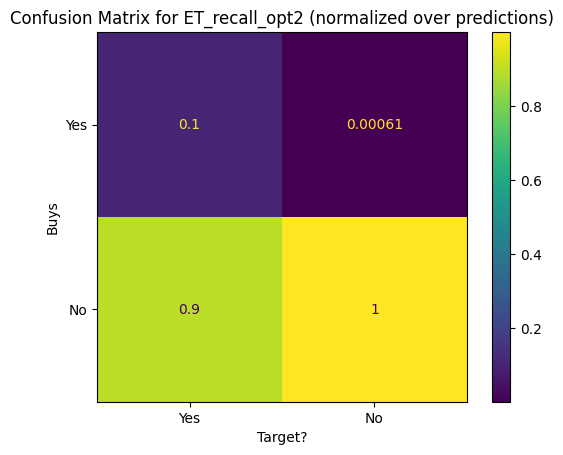

In [ ]:
CM_ETro2_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_ET_recall_opt2_test, normalize='pred', labels=[1, 0])
configure_CM(CM_ETro2_pred, "Confusion Matrix for ET_recall_opt2 (normalized over predictions)")
plt.show()

Downloading ET_recall_opt2

In [ ]:
import pickle

outfile = open('ET_recall_opt2', 'wb')
pickle.dump(ET_recall_opt2, outfile)
outfile.close()